In [1]:
import tensorflow as tf
tf.__version__

'1.13.1'

In [2]:
%matplotlib inline

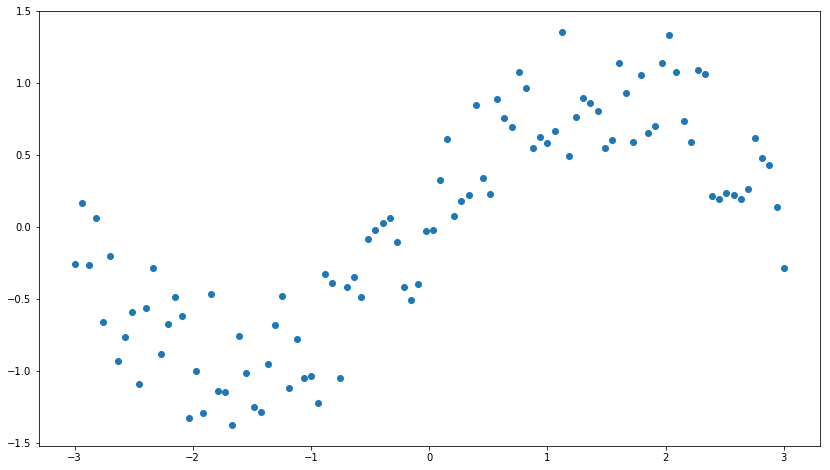

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(14,8) # 图长宽
n_observations = 100 # 点的数量
xs = np.linspace(-3, +3, n_observations) # np.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
ys = np.sin(xs)+np.random.uniform(-0.5, +0.5, n_observations) # uniform(low=0.0, high=1.0, size=None) 均匀分布
plt.scatter(xs, ys)
plt.show()

In [4]:
x = tf.placeholder(tf.float32, name='x')
y = tf.placeholder(tf.float32, name='y')
W = tf.Variable(tf.random_normal([1]), name='weight') # Outputs random values from a normal distribution. 正态分布
b = tf.Variable(tf.random_normal([1]), name='b')
W2 = tf.Variable(tf.random_normal([1]), name='weight_2')
W3 = tf.Variable(tf.random_normal([1]), name='weight_3')

Y_pred = tf.add(tf.multiply(x, W), b)
Y_pred = tf.add(tf.multiply(tf.pow(x, 2), W2), Y_pred)
Y_pred = tf.add(tf.multiply(tf.pow(x, 3), W3), Y_pred)

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
# loss = tf.reduce_mean(tf.pow(y-Y_pred, 2))
# loss = tf.square(y-Y_pred, name='loss') # Computes square of x element-wise.
sample_num = xs.shape[0]
loss =tf.reduce_sum(tf.pow(y-Y_pred, 2))/sample_num
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

Instructions for updating:
Use tf.cast instead.


In [6]:
epoches = 300
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    writer = tf.summary.FileWriter('./graphs/polynomial_reg', sess.graph)
    for i in range(epoches):
        total_loss = 0
        for x_batch, y_batch in zip(xs, ys):
            _, l = sess.run([optimizer, loss], feed_dict={x:x_batch, y: y_batch})
            total_loss += l
        if i%20 == 0:
            print('epoch %s: loss: %s'%(i, total_loss/sample_num))
    writer.close()
    W, b, W2, W3 = sess.run([W, b, W2, W3])

epoch 0: loss: 0.8387806461259728
epoch 20: loss: 0.004408572135657778
epoch 40: loss: 0.003251245183138982
epoch 60: loss: 0.0024800686877854616
epoch 80: loss: 0.0019541024561328868
epoch 100: loss: 0.001595379936824486
epoch 120: loss: 0.0013507372978312482
epoch 140: loss: 0.0011839183439445121
epoch 160: loss: 0.0010701792962140644
epoch 180: loss: 0.000992654599566638
epoch 200: loss: 0.0009398281871172287
epoch 220: loss: 0.0009038482049834329
epoch 240: loss: 0.0008793551527924138
epoch 260: loss: 0.0008626963423230905
epoch 280: loss: 0.000851375880951366


In [7]:
print(W)
print(b)
print(W2)
print(W3)

[0.7914031]
[0.04891739]
[-0.01754433]
[-0.08632426]


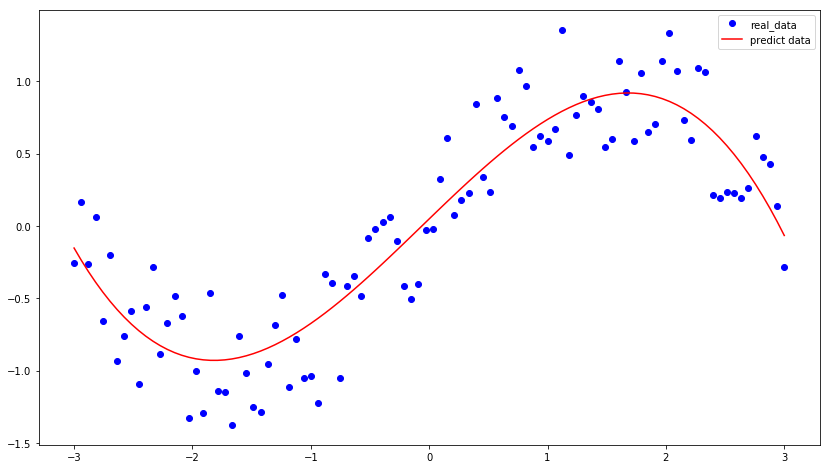

In [8]:
plt.plot(xs, ys, 'bo', label='real_data')
plt.plot(xs, xs*W+b+np.power(xs, 2)*W2+np.power(xs,3)*W3, 'r', label='predict data')
plt.legend()
plt.show()